# Sequences in Sage

## Explicitly Defined Sequences

A **sequence** is a (possibly infinite) list of numbers $(a_{0}, a_{1}, a_{2}\ldots) = (a_{n})_{n=0}^{\infty}$.

A sequence is defined **explicitly** if it has an explicit formula:
$$a_{n} = f(n).$$

**Example 1**: Consider the sequence $a_{n}$ given by
$$a_{n} = \frac{\ln n}{n}\quad\text{for}\quad n\geq 2.$$
Find $a_{10}$.

In [2]:
%display latex
# code cell for Example 1
var('n')
a(n) = log(n) / n

a(10)

1/10*log(10)

**Example 2**: Find $\lim_{n\to\infty}a_{n}$ if it exists.

In [3]:
# code cell for Example 2
limit(a(n), n = oo)

0

We can plot the terms of a sequence using `list_plot`:
```sage
list_plot(pts)
```

We can plot $a_{n} = \frac{\ln n}{n}$ as follows:

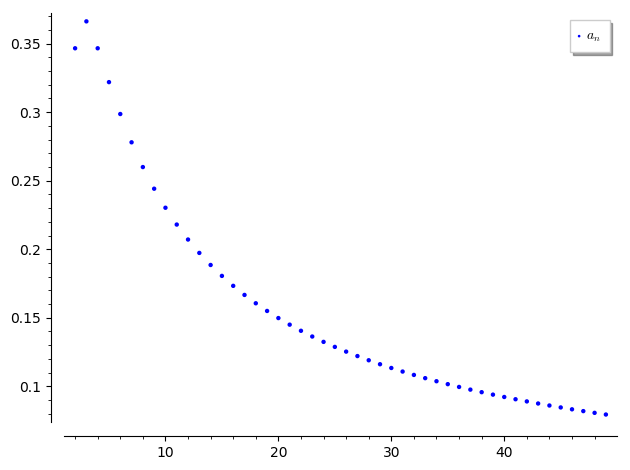

In [3]:
pts = [(n, log(n) / n) for n in range(2, 50)]    # use list comprehension to define points
list_plot(pts, legend_label = "$a_n$")

**Example 3**: Determine $\lim_{n\to\infty}\sqrt[n]{n}$. Note:
$$\sqrt[n]{n} = n^{1/n}.$$

In [4]:
# code cell for Example 3
var('n')
limit( n^(1/n), n = oo)

1

## Recurrence Relations

A **recurrence relation** is used to specify a sequence *recursively*:
$$T_{n} = T_{n-1} + n,\quad\text{with}\quad T_{1} = 1.$$

These can be defined in Sage using recursive functions. For such functions, it's important to specify base case carefully!

In [5]:
def T(n):
    """
    Computes T_n = T_(n-1) + n recursively.
    Be sure to enter positive whole number for n!
    """
    if n%1 == 0 and n >= 1:    # checks to see if user entered positive whole number for n
        if n == 1:    # base case
            return 1
        else:
            return T(n - 1) + n
    else:
        print('Please enter a positive whole number for n.')

[T(n) for n in range(1,10)]    # prints T_1, T_2, ..., T_9

[1, 3, 6, 10, 15, 21, 28, 36, 45]

**Example 4**: The **Fibonacci sequence** is defined by the recurrence
$$F_{n} = F_{n-1} + F_{n-2}\quad\text{with}\quad F_{1} = F_{2} = 1.$$
Find $F_{10}$.

In [8]:
# code cell for Example 4
def F(n):
    if n%1 == 0 and n >= 1:
        if n == 1 or n == 2:
            return 1
        else:
            return F(n - 1) + F(n - 2)

fibonacci(1000)

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

Sage can solve certain recurrences (i.e., find explicit formulas) by employing other systems, such as SymPy.

The following code cell uses `rsolve` from SymPy to solve the recurrence
$$F_{n} = F_{n-1} + F_{n-2} \quad\text{for}\quad F_{1} = F_{2} = 1.$$

In [7]:
from sympy import Function, rsolve
from sympy.abc import n

F = Function('F')
fib_rr = F(n) - F(n - 1) - F(n - 2)    # rearrange recurrence to set equal to 0
rsolve(fib_rr, F(n), { F(1):1, F(2):1 })

-sqrt(5)*(1/2 - sqrt(5)/2)**n/5 + sqrt(5)*(1/2 + sqrt(5)/2)**n/5

**Example 5**: Adapt the code above to solve the recurrence
$$T_{n} = T_{n - 1} + n\quad\text{with}\quad T_{1} = 1.$$

In [8]:
# code cell for Example 5